In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

# Hypothesis Testing

## Making a Decision, Soundly

In the last lecture we developed tools that make use of a _sample_ to draw a conclusion.

We were interested in how close a true (population) mean is to the mean you get from a sample.

Today we will move on to more involved decisions.

Namely, we will study how to draw a conclusion -- to a yes/no question -- when the answer depends on sampled data.

This problem goes by the name of _hypothesis testing._

````{margin}
```{note}
This lecture draws heavily on _Understanding the New Statistics_ by Geoff Cumming, and _Statistics Done Wrong_ by Alex Reinhart.   Another good source is _Regression and Other Stories_ by Andrew Gelman, Jennifer Hill, and Aki Vehtari (Chapter 4).
```
````

Hypothesis testing is focused on answering questions like:
* Does one medicine work better than another?
* Is one ad campaign more effective than another?
* Does one machine learning algorithm work better than another?
* Does one region experience higher temperatures than another?
* Is one set of voters more likely to go to the polls than another?

This style of "A vs B" questions are so prevalent that most every branch of natural science or social science is driven by them.

The problem with approaching such questions is that invariably, we must use _sampled data_ to answer them.

And sampled data means that our observations have an element of randomness.

So the problem of hypothesis testing centers on the question of __identifying statistically significant differences.__

## Fisher's $p$-value

The first strategy for answering this question was developed by Ronald Fisher in the 1920s.

```{margin} 
[Photo source.](https://twitter.com/citrusification/status/627827510416441344)
```

<center>

<img src="images/Fisher.jpg" width="250px">

</center>
<!--- Source: https://twitter.com/citrusification/status/627827510416441344 --->

Fisher was a geneticist and evolutionary biologist who made major contributions to statistical theory.

Fisher approached the problem of hypothesis testing as follows.

He cast the decision framework of a scientist as, essentially, deciding whether "something surprising" has occurred.

The question of what constitutes a "surprise" varies from one experiment to the next.

For example, one may consider it surprising if two experiments have different outcomes, or if a particular event occurs "unusually often."

````{margin}
```{note}
This example draws on the Wikipedia article [Lady Tasting Tea.](https://en.wikipedia.org/wiki/Lady_tasting_tea)
```
````

### The Lady Tasting Tea

Here is a famous story (dating from the 1930s) that Fisher himself used to illustrate his approach to hypothesis testing.

Fisher knew a woman (Muriel Bristol) who claimed that, when given a cup of hot tea and milk, she was able to 
tell whether the tea or the milk had been added first to the cup.

```{margin} 
[Photo source.](https://www.amazon.com/DSFHKUYBChinese-Painted-Porcelain-Ceremony-Office/dp/B08XZG5R17/)
```

<center>

<img src="images/eight-cups-of-test.png" width="250px">

</center>
<!--- Source: https://www.amazon.com/DSFHKUYBChinese-Painted-Porcelain-Ceremony-Office/dp/B08XZG5R17/ --->

Fisher introduced the term __null hypothesis__ to describe the "uninteresting" situation, in which nothing surprising has happened.   In this case, the null hypothesis
was that Ms. Bristol could not tell the difference between the two ways of pouring milk and tea.

Thus, the abstract concept of "making a discovery" is operationalized as __rejecting the null hypothesis.__

Fisher stated that the null hypothesis is "never proved or established, but is possibly disproved, in the course of experimentation".

### Rejecting the null hypothesis

On what basis can we reject the null hypothesis?    Fisher proposed that we use a __test statistic__ whose distribution we can compute if the null hypothesis is true.  

We then perform the experiment and get some observed value for the test statistic.   We can then ask whether a value of that magnitude, or greater, would have occurred under the null hypothesis.

For this purpose Fisher introduced the __p-value.__

### The p-value

__Definition.__  The __p-value__ is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.

More formally, consider an observed test statistic $t$ from an unknown distribution $T$.  Then the _p_-value $p$
is what the prior probability would be of observing a test-statistic value at least as "extreme" as 
$t$ if null hypothesis $H_{0}$ were true.

### Example: p-value for the lady and the tea

Let's see how this works for the lady tasting tea. 

Fisher proposed to give Ms. Bristol eight cups, four of each variety (4 milk-poured-first, and 4 tea-poured-first).  The order of the cups was unknown to Ms. Bristol.

<center>

<img src="images/eight-cups-of-test.png" width="250px">

</center>
<!--- Source: https://www.amazon.com/DSFHKUYBChinese-Painted-Porcelain-Ceremony-Office/dp/B08XZG5R17/ --->

He informed her of the design of the experiment, so she knew that exactly four cups would be of each variety.

Of course, since she knows there are four of each type, her task is to identify the four in which she thinks the milk was poured first.  

Our test statistic is a natural one:  we will let $t$ equal the number of cups (out of four) correctly identified by Ms. Bristol.

One could then ask what the probability would be for her getting the specific number of cups she identified correct, or more, just by chance.   This is the _p_-value for our experiment.

There are 8 cups of tea, and she chooses four of them.  So there are 

$$ {\displaystyle {\binom {8}{4}}={\frac {8!}{4!(8-4)!}}=70} $$

possible choices she could make.

__If her choices were random,__ the number of successes among the four chosen is given by the hypergeometric distribution (which is the distribution that governs sampling without replacement).  So we can compute the probability of seeing $t = 0, 1, 2, 3,$ or 4 cups correct.

Specifically, for a random variable 
$X$ equal to the number of successes, we write 

$${\displaystyle X\sim \operatorname {Hypergeometric} (N=8,K=4,n=4)},$$

where $N$ is the population size or total number of cups of tea, $K$ is the number of success states in the population or four cups of either type, and  
$n$ is the number of draws, or four cups. 

__What actually happened?__  Fisher actually "ran" this experiment.  And sure enough, Ms. Bristol identified all four cups correctly.  So the value of the test statistic is $t = 4$.

And what is the _p_-value?   This is

$$ p = P(X \ge t) = P(X \ge 4) = \frac{1}{70} \approx 1.4\%  $$

In other words, if the lady were in fact choosing at random, this outcome would happen only about 1.4% of the time, ie, one time in 70.

Given this result, Fisher was willing to conclude that the lady's tea identification was not random, and therefore he was willing to __reject the null hypothesis.__

__What if she had failed?__   What if the lady had chosen instead two cups of each kind of tea?

In this case the _p_-value would have been $p \approx 0.75$ or 75%.

Should we then conclude that the null hypothesis is __true__?

Definitely __not.__  By choosing as she did, the lady would _not_ be providing any conclusive evidence that her choices were __random__.  

As Fisher emphasized, we can never accept the null hypothesis -- we can only fail to reject it.

## Drawing Positive Conclusions: Neyman-Pearson

Fisher's notion of _p_-value put the abstract idea of a "discovery" onto a mathematical footing.

However, as we think about using it in practice, we notice a number of things it doesn't do:
* A _p_-value does not tell us an affirmative fact -- that some hypothesis is _true._
    * it can only tell us that some hypothesis is _false_ (the null hypothesis)
    * eg, that the lady tasting tea is making decisions that are "not random"
* what if we wanted to say something about _how well_ the lady can distinguish the two cups of tea?

```{margin}
An interesting discussion of Jerzy Neyman's contributions is [here](http://daniellakens.blogspot.com/2021/09/jerzy-neyman-positive-role-model-in.html). 
```

Jerzy Neyman and Egon Pearson advanced a approach to deal with this.

```{margin}
Jerzy Neyman: [Source](http://daniellakens.blogspot.com/2021/09/jerzy-neyman-positive-role-model-in.html).

Egon Pearson: original publication not known.  [Immediate source](https://mathshistory.st-andrews.ac.uk/Biographies/Pearson_Egon/pictdisplay/), [Fair use](https://en.wikipedia.org/w/index.php?curid=65391211).
```

<center>

<img src="images/Jerzy-Neyman.jpg" width="250px"> 
    
    Jerzy Neyman
    
</center>

<center>
    
<img src="images/Egon_Pearson.jpg" width="250px"> 
    
    Egon Pearson

</center>

They argued that the experimenter should make a statement in advance about what they are looking for.   They called this the __alternative hypothesis.__

```{margin}
<!--- Source: https://pixabay.com/photos/vaccine-coronavirus-medical-hand-6165772/ --->
Image by <a href="https://pixabay.com/users/spencerbdavis1-21090082/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=6165772">Spencer Davis</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=6165772">Pixabay</a>
```

For example, let's say we are investigating whether a vaccine shortens the duration of an infectious illness.

<br>
<center>

<img src="images/vaccine-g1396974be_1920.jpg" width="250px">

</center>

We would state two hypotheses:
    
   * $H_0$: the null hypothesis: vaccinated and unvaccinated individuals have the same average duration of illness.
   * $H_1$: the alternative hypothesis: vaccinated and unvaccinated individuals have different average durations of illness.
   
Notice that exactly one of these must be true, so if we reject $H_0$ that implies we accept $H_1$.

This framework is helpful, because it allows us to distinguish two different kinds of errors:

First, we might err by concluding "there is a difference" when in fact there is no difference.  This is called
* False Positive, or
* Type I Error.

Formally, we say that this is "mistaken rejection of the null hypothesis".

Second, we might err by concluding "there is no difference" when in fact there is a difference.   This is called
* False Negative, or
* Type II Error.

Note that these can be very different, and have very different implications in practice.

For example, in a medical test, there is a __big__ difference between a false positive and a false negative.

```{margin}
<!--- Source: https://pixabay.com/photos/doctor-surgeon-hospital-surgery-5707722/ --->
Image by <a href="https://pixabay.com/users/10634669-10634669/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5707722">Sam Williams</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5707722">Pixabay</a>
```

<center>

<img src="images/doctor-g0d80a1aa1_1920.jpg" width="250px">

</center>


Consider a cancer screen.  
* A false positive is a result "cancer is present" when in fact it is not present.   
* A false negative is a result "cancer is not present" when in fact it is present.  

Should we treat these two kinds of errors as equally important?

Neyman and Pearson felt that in science, we want to control the false positive rate to avoid making incorrect "discoveries."

They proposed the following:  the experimenter chooses a false positive rate in advance, called $\alpha$.  

The value of $\alpha$ should be set based on experience and expectations.  

The experimenter then constructs a test that compares the two hypotheses, and computes the _p_-value associated with the null hypothesis.  The experimenter rejects the null hypothesis if $p < \alpha$.

For example, say the experimenter wants to be very conservative and rarely make an incorrect declaration that an effect is present.  Then they would set $\alpha$ to a small value, say 0.001.

So they would demand to see a small _p_-value, ie, less than 0.001, in order to reject the null hypothesis.

Notice however, that this means that in doing so, they run the risk of false negatives -- failing to detect an effect that __is__ present.

In the Neyman-Pearson framework, we don't look at the value of $p$ other than to compare it to $\alpha$.  That is, unlike Fisher's approach, we don't use $p$ to tell us "how big the effect is."  

For example, if $\alpha$ were 0.05, we would reject the null hypothesis if $p$ were 0.04, or 0.01, or 0.00001.   

So, unlike Fisher's procedure, this method deliberately does __not__ address the strength of evidence in any one particular experiment.

Rather, the goal is, __over the course of many experiments,__ to limit the rate at which incorrect "discoveries" are made.

## NHST and its Limitations

In current practice, many experimenters use something that is neither Fisher's method nor the Neyman-Pearson method.  

What is often done in practice is to use a standard threshold of $p < 0.05$ or $p < 0.01$ as the one-size-fits-all test for "statistical significance."  

This goes by the term "Null Hypothesis Significance Testing" or __NHST.__

There are many problems with this approach. In fact, you should avoid it whenever possible.   Here are some problems.

__Problem 1: Ignoring effect size.__ Very often what matters most in an experiment is _effect size._  Effect size answers the question "how large is the difference?" between two experimental outcomes.  

For example, say we are interested in studying state-by-state performance of students on the SAT exam.  (Note: this is made-up data!)

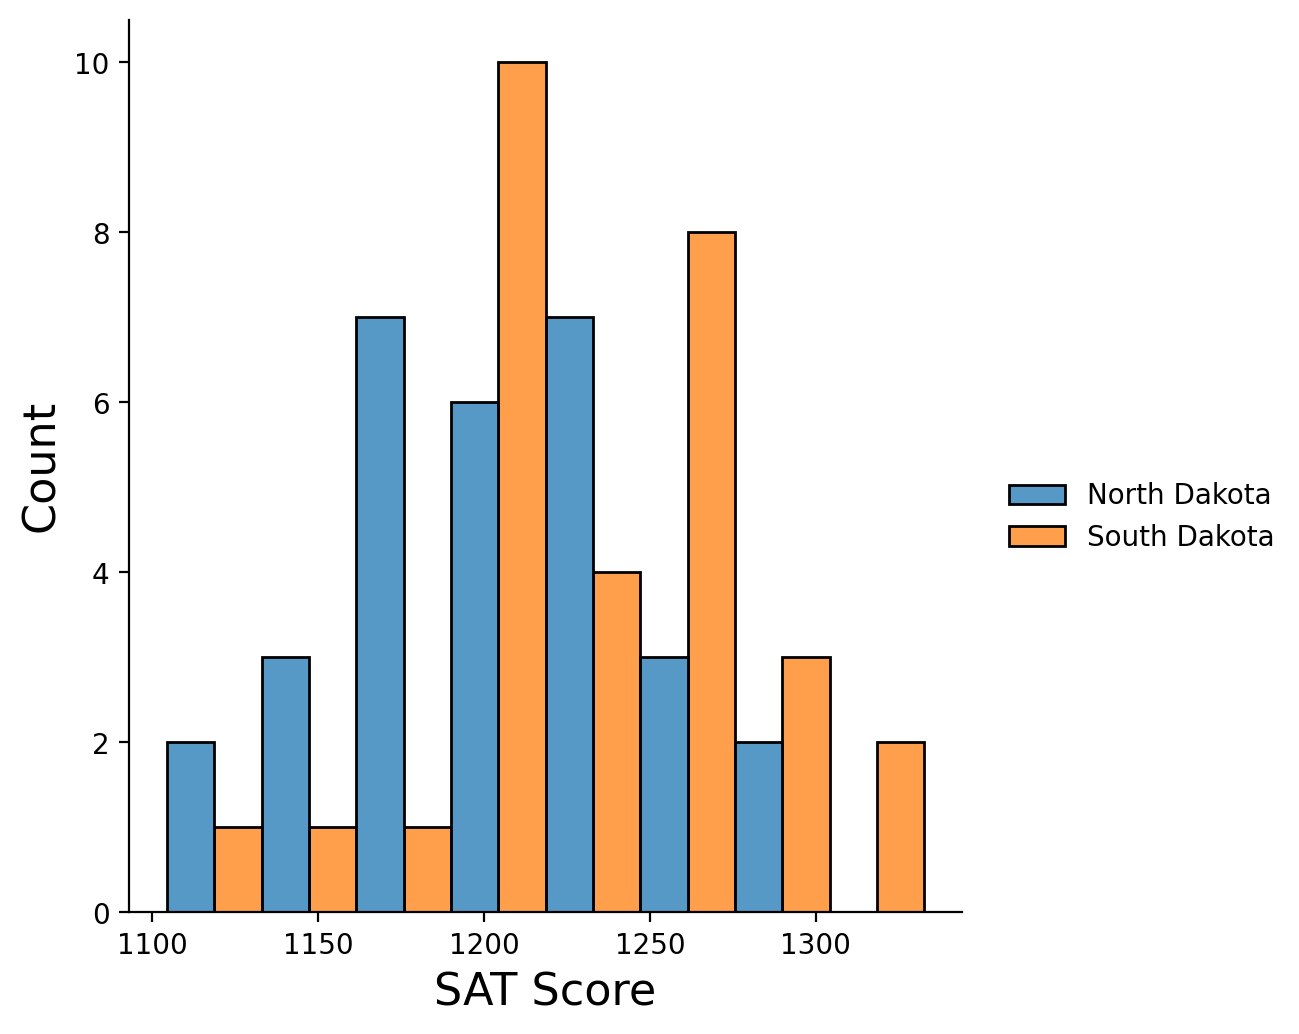

In [2]:
rng = default_rng(12)
samp_size = 30
mu1 = 1200
mu2 = 1220
sig1 = 50
sig2 = 50
df = pd.DataFrame([norm.rvs(size = samp_size, loc = mu1, scale = sig1, random_state = rng),
                  norm.rvs(size = samp_size, loc = mu2, scale = sig2, random_state = rng)]).T
df.columns = ['North Dakota', 'South Dakota']
sns.displot(df, multiple = 'dodge')
plt.ylabel('Count', size = 16)
plt.xlabel('SAT Score', size = 16);

Under the Neyman-Pearson or NHST testing framework, our null hypothesis would be "students in North Dakota have the same average scores on the SAT than students in South Dakota."

Now, almost certainly this is __not__ true.  That's not the right question!   

The important question is, in which state are scores higher, and how large is the difference -- ie, what is the __effect size?__

__Problem 2: Misunderstanding what a p-value is.__

The _p_-value is the probability of the results if the null hypothesis were true.   In other words, it is the probability that the results would occur if they were due to chance alone.

This is __not__ the same as the probability that the results are due to chance!  Mistakenly thinking so is called the _inverse probability fallacy._    To do that, is to confuse $p(\text{data}|H_0)$ with $p(H_0|\text{data})$.

For example, if you are taking this course, there is a high probability you are a student a BU.   But that does not mean that if you are a student at BU, there is a high probability you are taking this course.

__Problem 3: Ignoring our Expertise or Prior Knowledge.__

One of the ways in which standard NHST is flawed is in the standard use of 0.05 or 0.01 as a significance threshold.   This fixed value of $\alpha = 0.05$ or 0.01 in practice ignores what we know.  

Consider a study in which researchers claim to detect 33 individuals out of 97 who show psychic ability, yielding a _p_-value of 0.047.  By standard practice, this would be considered statistically significant since $p < 0.05$.  But given what we know about claims for psychic ability, are we really confident that the experiment shows that people have psychic abilities?

Another reason for avoiding a fixed significance threshold relates to our tolerance for false alarms.  For example, particle physicists are particularly concerned with avoiding false alarms, which would trigger the development of new theories.   So the standard for detection in particle physics is generally at least $5\sigma$, corresponding to a p-value of about $3 \times 10^{-7}$.

<!--- cites: https://www.r-bloggers.com/2012/07/the-higgs-boson-5-sigma-and-the-concept-of-p-values/, https://www.newscientist.com/article/2315418-particle-physics-could-be-rewritten-after-shock-w-boson-measurement/?utm_campaign=RSS%7CNSNS&utm_source=NSNS&utm_medium=RSS&utm_content=currents
 --->

__Problem 4: Downplaying False Negatives.__

The standard NHST framework focuses on avoiding Type I errors (false positives).  However if we fail to find statistical significance where there is a true effect, we are committing a Type II error (a false negative).  

Unfortunately, often little attention is paid to Type II errors.  A type II error can occur if an experiment does not collect enough data to establish small confidence intervals.  This is called an _underpowered_ experiment.  

As a result, particularly when working with small datasets, we must be careful not to take statistical nonsignificance as evidence of a zero effect.

## Have Confidence in Intervals

In general, whenever possible, instead of using _p_-values to demonstrate statistical signficance, it is better to use __confidence intervals.__

For example, recall the example from the end of the last lecture:
    
|   | height | 95% CI |
|---|---|---|
| men, n = 25 | 69.0 in | [68.1, 69.9]|
| women, n = 23 | 61.1 in | [60.3, 62.0] |

Notice that presenting confidence intervals avoids the problems associated with _p_-values and NHST.

We can easily see that the two groups have a statistically significant difference in means, because __the confidence intervals do not overlap.__

Furthermore, we can also easily see the effect size -- the difference in average heights between men and women.